In [121]:
!ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot open directory '.': Transport endpoint is not connected


In [122]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [123]:
import os
os.chdir("drive/My Drive/Papers and Stuff")

E0824 10:16:48.859622 140288136112000 ultratb.py:152] Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-123-a6c73df8f1d3>", line 2, in <module>
    os.chdir("drive/My Drive/Papers and Stuff")
OSError: [Errno 107] Transport endpoint is not connected: 'drive/My Drive/Papers and Stuff'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)

OSError: ignored

In [0]:
os.chdir("LLNet Implementation")

In [0]:
!ls

In [0]:
#Load images from a directory in python

#!/usr/bin/python
from os import listdir
from PIL import Image as PImage
#from IPython.display import Image              # to display the images if needed

def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)
        #Image(path + image)                # to display the images if needed
    return loadedImages

path = "./Nature_Images_Dataset/"

# your images in an array
imgs = loadImages(path)

In [0]:
import numpy as np
import keras

In [0]:
imgs[0].size

In [0]:
foo = imgs[0].resize((300,300),PImage.ANTIALIAS)

In [0]:
foo.size

In [0]:
import matplotlib.pyplot as plt

plt.imshow(foo)

In [0]:
from sklearn.feature_extraction import image

imgarr = np.array(foo)  
patches = image.extract_patches_2d(imgarr, (34, 34), max_patches = 145)

In [0]:
np.shape(patches)

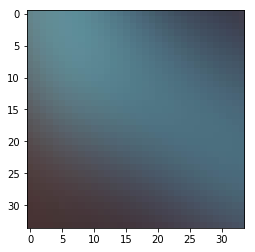

In [0]:
from IPython.display import display
import matplotlib.pyplot as plt

plt.imshow(patches[12])

In [0]:
Y = patches/255

In [0]:
import random
import cv2

def adjust_gamma(image, gamma=1.0):

   invGamma = 1.0 / gamma
   table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

   return cv2.LUT(image, table)

gamma = 0.5  
X = []

for patch in patches:
    X.append(adjust_gamma(patch, gamma)/255)

In [0]:
from keras import models, layers

In [0]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=[34,34,3]))
model.add(layers.Dense(2000, activation="sigmoid"))
model.add(layers.Dense(1600, activation="sigmoid"))
model.add(layers.Dense(1200, activation="sigmoid"))
model.add(layers.Dense(1600, activation="sigmoid"))
model.add(layers.Dense(2000, activation="sigmoid"))
model.add(layers.Dense(3468, activation="sigmoid"))
model.add(layers.Reshape([34,34,3]))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 3468)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 2000)              6938000   
_________________________________________________________________
dense_38 (Dense)             (None, 1600)              3201600   
_________________________________________________________________
dense_39 (Dense)             (None, 1200)              1921200   
_________________________________________________________________
dense_40 (Dense)             (None, 1600)              1921600   
_________________________________________________________________
dense_41 (Dense)             (None, 2000)              3202000   
_________________________________________________________________
dense_42 (Dense)             (None, 3468)              6939468   
__________

In [0]:
model.compile(optimizer='rmsprop', loss='mse')

In [0]:
X = np.array(X)
Y = np.array(Y)

In [0]:
model.fit(X, Y, epochs = 500)

Epoch 1/500
145/145 [==============================] - 0s 3ms/step - loss: 3.5911e-04
Epoch 2/500
145/145 [==============================] - 0s 1ms/step - loss: 3.7867e-04
Epoch 3/500
145/145 [==============================] - 0s 2ms/step - loss: 4.2572e-04
Epoch 4/500
145/145 [==============================] - 0s 1ms/step - loss: 3.4039e-04
Epoch 5/500
145/145 [==============================] - 0s 2ms/step - loss: 3.7698e-04
Epoch 6/500
145/145 [==============================] - 0s 1ms/step - loss: 4.1407e-04
Epoch 7/500
145/145 [==============================] - 0s 2ms/step - loss: 3.6521e-04
Epoch 8/500
145/145 [==============================] - 0s 1ms/step - loss: 3.4809e-04
Epoch 9/500
145/145 [==============================] - 0s 2ms/step - loss: 3.7612e-04
Epoch 10/500
145/145 [==============================] - 0s 1ms/step - loss: 3.7163e-04
Epoch 11/500
145/145 [==============================] - 0s 1ms/step - loss: 3.7793e-04
Epoch 12/500
145/145 [==============================

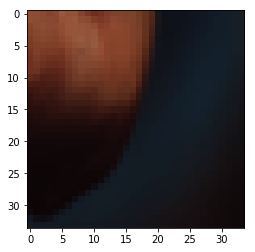

In [0]:
plt.imshow(X[121])

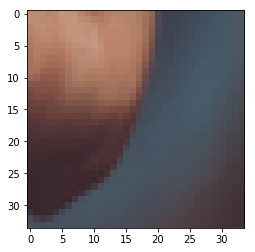

In [0]:
plt.imshow(Y[121])

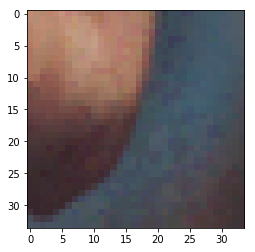

In [0]:
imgprs = model.predict(X[121:122])
imgpr = imgprs.squeeze()
plt.imshow(imgpr)